# Diabetes Machine Learning Model
## The purpose of this notebook is to predict whether a patient has diabetes.

### The flow will be as follows:
1. Prepare the data
2. Choose the right estimator (model or algorithm) for the dataset
3. Tune the hyperparameters to optimize the model
4. Save the model
5. Use the model to make preditions on new patients

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## 1. Prepare the data
* Remove features that are of little use
* Remove rows with null labels
* Either impute missing features, or remove those records.
* Encode non-numeric features

In [2]:
diabetes = pd.read_csv("./data/diabetes.csv")

In [3]:
diabetes.head()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,1,193,77,49,"3,9",19,female,61,119,"22,5",118,70,32,38,"0,84",No diabetes
1,2,146,79,41,"3,6",19,female,60,135,"26,4",108,58,33,40,"0,83",No diabetes
2,3,217,75,54,4,20,female,67,187,"29,3",110,72,40,45,"0,89",No diabetes
3,4,226,97,70,"3,2",20,female,64,114,"19,6",122,64,31,39,"0,79",No diabetes
4,5,164,91,67,"2,4",20,female,70,141,"20,2",122,86,32,39,"0,82",No diabetes


In [4]:
diabetes["diabetes"].value_counts()

No diabetes    330
Diabetes        60
Name: diabetes, dtype: int64

In [5]:
diabetes["patient_number"]

0        1
1        2
2        3
3        4
4        5
      ... 
385    386
386    387
387    388
388    389
389    390
Name: patient_number, Length: 390, dtype: int64

In [6]:
# Patien number is of no use, so drop it.
diabetes.drop(["patient_number"], axis=1, inplace=True)

### Remove rows with null labels

In [7]:
# Check for missing data
diabetes.isna().sum()

cholesterol        0
glucose            0
hdl_chol           0
chol_hdl_ratio     0
age                0
gender             0
height             0
weight             0
bmi                0
systolic_bp        0
diastolic_bp       0
waist              0
hip                0
waist_hip_ratio    0
diabetes           0
dtype: int64

### Encode non-numeric data

In [8]:
diabetes.dtypes

cholesterol         int64
glucose             int64
hdl_chol            int64
chol_hdl_ratio     object
age                 int64
gender             object
height              int64
weight              int64
bmi                object
systolic_bp         int64
diastolic_bp        int64
waist               int64
hip                 int64
waist_hip_ratio    object
diabetes           object
dtype: object

In [9]:
# Set is using commas instead of decimals for chol_hdl_ratio, bmi, and waist_hip_ratio
# See if all values are either whole or have a comma.
chol_comma = diabetes["chol_hdl_ratio"].str.contains(',').sum()
chol_whole = diabetes["chol_hdl_ratio"].str.isdigit().sum()
chol_total = diabetes["chol_hdl_ratio"].size
print(f"{(100*(chol_comma + chol_whole)/chol_total):.2f}% of chol_hdl_ratio data are whole or have comma.")

100.00% of chol_hdl_ratio data are whole or have comma.


In [10]:
# Try same for BMI
bmi_comma = diabetes["bmi"].str.contains(',').sum()
bmi_whole = diabetes["bmi"].str.isdigit().sum()
bmi_total = diabetes["bmi"].size
print(f"{(100*(bmi_comma + bmi_whole)/bmi_total):.2f}% of bmi data are whole or have comma.")

100.00% of bmi data are whole or have comma.


In [11]:
# Try same for Waist_hip_ratio
waist_comma = diabetes["waist_hip_ratio"].str.contains(',').sum()
waist_whole = diabetes["waist_hip_ratio"].str.isdigit().sum()
waist_total = diabetes["waist_hip_ratio"].size
print(f"{(100*(waist_comma + waist_whole)/waist_total):.2f}% of waist_hip_ratio data are whole or have comma.")

100.00% of waist_hip_ratio data are whole or have comma.


### If they weren't 100%, we could drop whichever records didn't have a comma and weren't whole.
**They were all 100%, so time to replace commas with decimals**

In [12]:
# Convert from obj to string and then replace and convert to floats
diabetes["chol_hdl_ratio"] = diabetes["chol_hdl_ratio"].str.replace(',', '.').astype(float)
diabetes["bmi"] = diabetes["bmi"].str.replace(',', '.').astype(float)
diabetes["waist_hip_ratio"] = diabetes["waist_hip_ratio"].str.replace(',', '.').astype(float)

### Let's also replace the diabetes column with true and false text
Why? Because LabelEncoder encodes alphabetically. I want no diabetes to = 0 and diabetes to = 1.
If this change isn't made, false = 1 and true = 0.
This change will make false = 0 and true = 1 which makes more sense.

In [13]:
diabetes["diabetes"] = diabetes["diabetes"].str.replace('No diabetes', 'False')
diabetes["diabetes"] = diabetes["diabetes"].str.replace('Diabetes', 'True')

In [14]:
# See data types
diabetes.dtypes

cholesterol          int64
glucose              int64
hdl_chol             int64
chol_hdl_ratio     float64
age                  int64
gender              object
height               int64
weight               int64
bmi                float64
systolic_bp          int64
diastolic_bp         int64
waist                int64
hip                  int64
waist_hip_ratio    float64
diabetes            object
dtype: object

#### Visualize genders and label

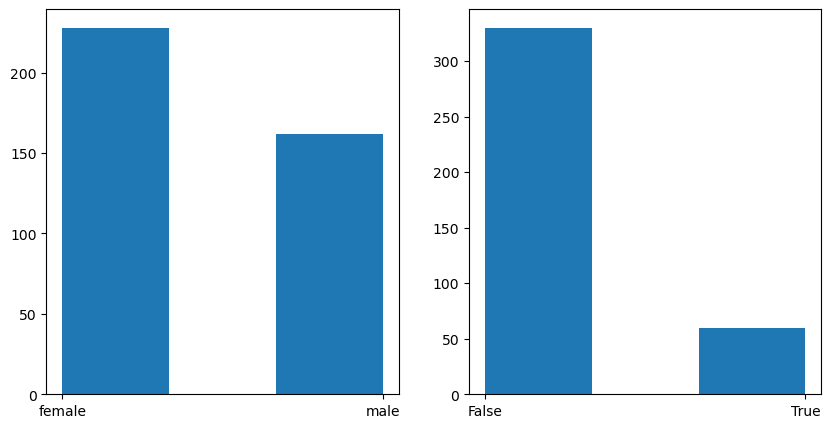

In [15]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax0.hist(diabetes["gender"], bins=3)
ax1.hist(diabetes["diabetes"], bins = 3);

### Encode non-numeric features and labels

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()

diabetes["gender"] = le.fit_transform(diabetes["gender"])
diabetes["diabetes"] = le.fit_transform(diabetes["diabetes"])

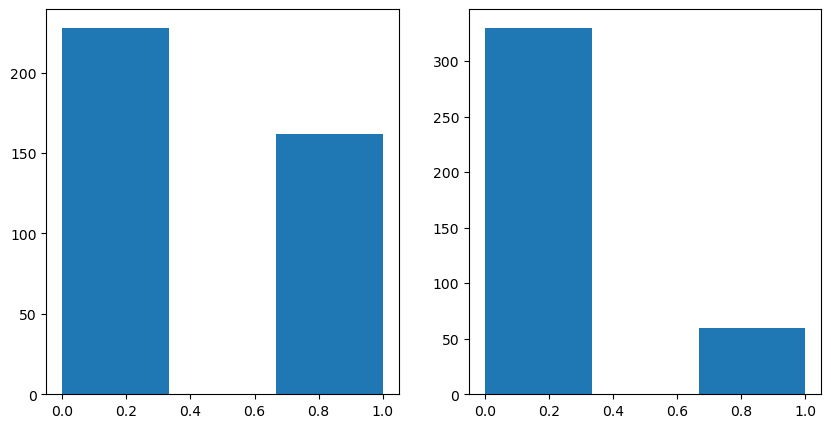

In [18]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax0.hist(diabetes["gender"], bins=3)
ax1.hist(diabetes["diabetes"], bins=3);

In [19]:
diabetes.dtypes

cholesterol          int64
glucose              int64
hdl_chol             int64
chol_hdl_ratio     float64
age                  int64
gender               int32
height               int64
weight               int64
bmi                float64
systolic_bp          int64
diastolic_bp         int64
waist                int64
hip                  int64
waist_hip_ratio    float64
diabetes             int32
dtype: object

In [20]:
diabetes.to_csv("./data/diabetes-cleaned.csv")

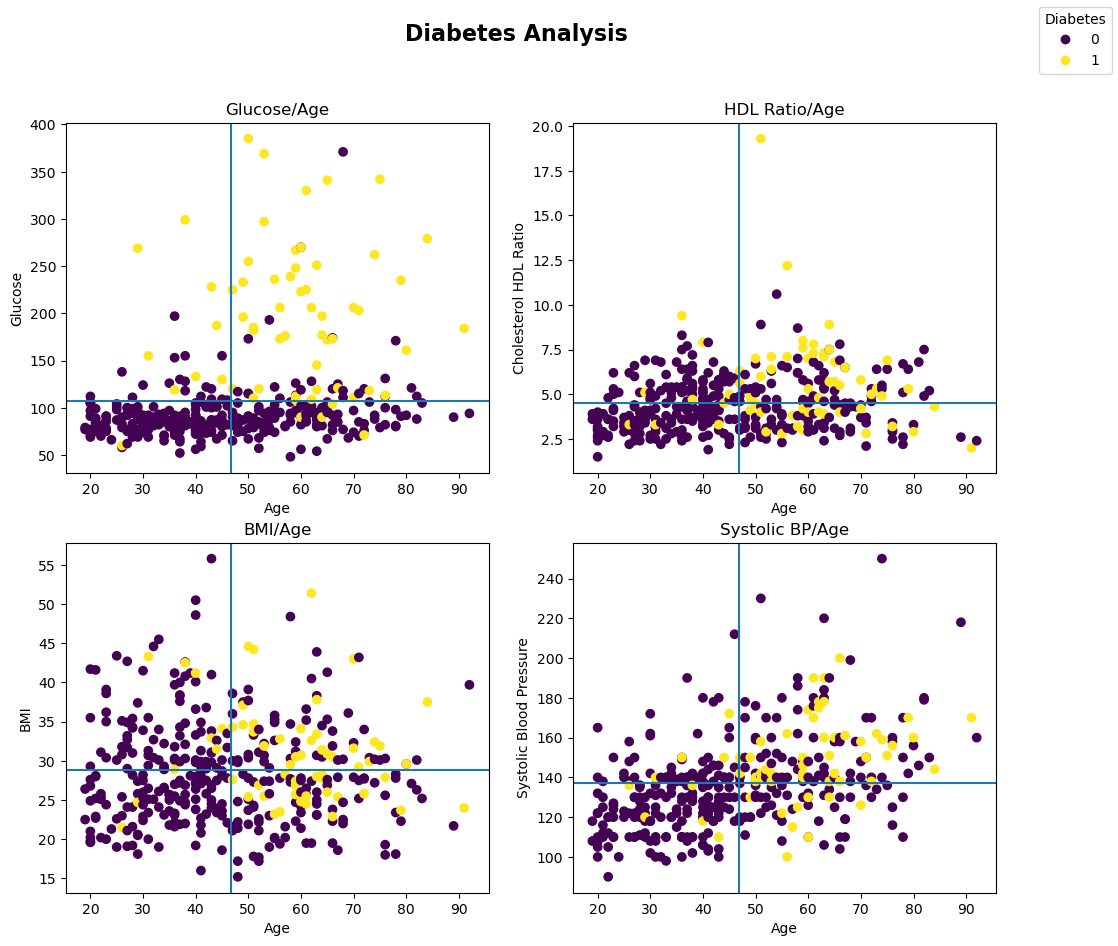

In [21]:
x = diabetes["age"]
y0 = diabetes["glucose"]
y1 = diabetes["chol_hdl_ratio"]
y2 = diabetes["bmi"]
y3 = diabetes["systolic_bp"]
color = diabetes["diabetes"]

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(12,10))

# Make scatter plots
glucose = ax0.scatter(x, y0, c=color)
hdl_ratio = ax1.scatter(x, y1, c=color)
bmi = ax2.scatter(x, y2, c=color)
systolic = ax3.scatter(x, y3, c=color)

# Add details to scatter plots

ax0.set(title="Glucose/Age", xlabel="Age", ylabel="Glucose")
ax1.set(title="HDL Ratio/Age", xlabel="Age", ylabel="Cholesterol HDL Ratio")
ax2.set(title="BMI/Age", xlabel="Age", ylabel="BMI")
ax3.set(title="Systolic BP/Age", xlabel="Age", ylabel="Systolic Blood Pressure")

# Add legend
fig.suptitle(t="Diabetes Analysis", fontsize=16, fontweight="bold")
fig.legend(*glucose.legend_elements(), title="Diabetes")

# Add horizontal lines
ax0.axhline(y0.mean()), ax0.axvline(x.mean())
ax1.axhline(y1.mean()), ax1.axvline(x.mean())
ax2.axhline(y2.mean()), ax2.axvline(x.mean())
ax3.axhline(y3.mean()), ax3.axvline(x.mean());

## 2. Choose the right estimator
* Follow this flowchart: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
* Choose the model with the best mean accuracy

In [22]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [23]:
lsvc = LinearSVC(max_iter=1000)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier()
X = diabetes.drop("diabetes", axis=1)
y = diabetes["diabetes"]

In [24]:
np.random.seed(42)
cv = 5
cross_val_score(lsvc, X, y, cv=cv).mean(), cross_val_score(knc, X, y, cv=cv).mean(), cross_val_score(rfc, X, y, cv=cv).mean()

D:\Windows\jrine\JupyterProjects\SampleProject1\env\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Windows\jrine\JupyterProjects\SampleProject1\env\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Windows\jrine\JupyterProjects\SampleProject1\env\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Windows\jrine\JupyterProjects\SampleProject1\env\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Windows\jrine\JupyterProjects\SampleProject1\env\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


(0.7564102564102564, 0.9282051282051281, 0.8205128205128205)

### KNeighborsClassifier is the best of the ones tried

In [25]:
knc.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

## 3. Optimize the model by tuning hyper parameters

#### 3.1 Evaluate the model with default hyperparameters

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [27]:
# Create a fucntion to return the scores
def predictions(y_true, y_preds):
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    dict = {"accuracy" : round(accuracy, 2),
            "precision" : round(precision, 2),
            "recall" : round(recall, 2),
            "F1" : round(f1, 2)}
    print(f"Accuracy: {100*accuracy:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1: {f1:.2f}")
    return dict

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
np.random.seed(42)
# Split to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# new classifier that hasn't seen data
knc = KNeighborsClassifier()

knc.fit(X_train, y_train)
y_preds = knc.predict(X_test)

default_metrics = predictions(y_test, y_preds)

Accuracy: 89.74%
Precision: 0.75
Recall: 0.75
F1: 0.75


### Tune hyperparameters using RandomizedSearchCV

In [30]:
from sklearn.model_selection import RandomizedSearchCV

In [31]:
np.random.seed(42)

# Set up a grid for parameters to try
grid = {'algorithm': ['auto', 'ball_tree', 'kd_tree'],
        'leaf_size': [10, 20, 30, 40, 50],
        'n_neighbors': [2, 3, 5, 7, 8],
        'weights': ['uniform', 'distance']
    }

# New Classifier that hasn't seen data
knc = KNeighborsClassifier()

# Set up RandomizedSearchCV
rs_knc = RandomizedSearchCV(estimator=knc,
                           param_distributions=grid,
                           n_iter=20,
                           cv=5,
                           verbose=2,
                           random_state=42,
                           refit=True)

rs_knc.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END algorithm=ball_tree, leaf_size=30, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=30, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=30, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=30, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=30, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=20, n_neighbors=8, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=20, n_neighbors=8, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=20, n_neighbors=8, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=20, n_neighbors=8, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=20, n_neighbors=8, weights=uniform; total time=   0.0s
[CV] END

[CV] END algorithm=ball_tree, leaf_size=10, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=40, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=40, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=40, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=40, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=40, n_neighbors=3, weights=uniform; total time=   0.0s


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=20,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree'],
                                        'leaf_size': [10, 20, 30, 40, 50],
                                        'n_neighbors': [2, 3, 5, 7, 8],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, verbose=2)

In [32]:
rs_knc.best_params_

{'weights': 'distance', 'n_neighbors': 8, 'leaf_size': 10, 'algorithm': 'auto'}

In [33]:
np.random.seed(42)

#Use best params to predict test data
rs_y_preds = rs_knc.predict(X_test)
rs_metrics = predictions(y_test, rs_y_preds)

Accuracy: 91.03%
Precision: 0.76
Recall: 0.81
F1: 0.79


### Tune hyperparameters using GridSearchCV

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
grid

{'algorithm': ['auto', 'ball_tree', 'kd_tree'],
 'leaf_size': [10, 20, 30, 40, 50],
 'n_neighbors': [2, 3, 5, 7, 8],
 'weights': ['uniform', 'distance']}

In [36]:
np.random.seed(42)

grid_2 = {'algorithm': ['auto'],
          'leaf_size': [5, 8, 10, 12, 15],
          'n_neighbors': [6, 7, 8, 9, 10],
          'weights': ['distance']}
                        
knc = KNeighborsClassifier()

gs_knc = GridSearchCV(estimator=knc,
                      param_grid=grid_2,
                      cv=5,
                      verbose=2,
                      refit=True)

gs_knc.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END algorithm=auto, leaf_size=5, n_neighbors=6, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=5, n_neighbors=6, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=5, n_neighbors=6, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=5, n_neighbors=6, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=5, n_neighbors=6, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=5, n_neighbors=7, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=5, n_neighbors=7, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=5, n_neighbors=7, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=5, n_neighbors=7, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=5, n_neighbors=7, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=5, 

[CV] END algorithm=auto, leaf_size=12, n_neighbors=10, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=15, n_neighbors=6, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=15, n_neighbors=6, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=15, n_neighbors=6, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=15, n_neighbors=6, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=15, n_neighbors=6, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=15, n_neighbors=7, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=15, n_neighbors=7, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=15, n_neighbors=7, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=15, n_neighbors=7, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=15, n_neighbors=7, weights=distance; total time=   0.0

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto'], 'leaf_size': [5, 8, 10, 12, 15],
                         'n_neighbors': [6, 7, 8, 9, 10],
                         'weights': ['distance']},
             verbose=2)

In [37]:
gs_knc.best_params_

{'algorithm': 'auto', 'leaf_size': 5, 'n_neighbors': 6, 'weights': 'distance'}

In [38]:
np.random.seed(42)

gs_y_preds = gs_knc.predict(X_test)
gs_metrics = predictions(y_test, gs_y_preds)

Accuracy: 91.03%
Precision: 0.76
Recall: 0.81
F1: 0.79


In [39]:
tuning_df = pd.DataFrame({"baseline" : default_metrics,
                          "random search" : rs_metrics,
                          "grid search" : gs_metrics})
tuning_df

,baseline,random search,grid search
accuracy,0.90,0.91,0.91
precision,0.75,0.76,0.76
recall,0.75,0.81,0.81
F1,0.75,0.79,0.79


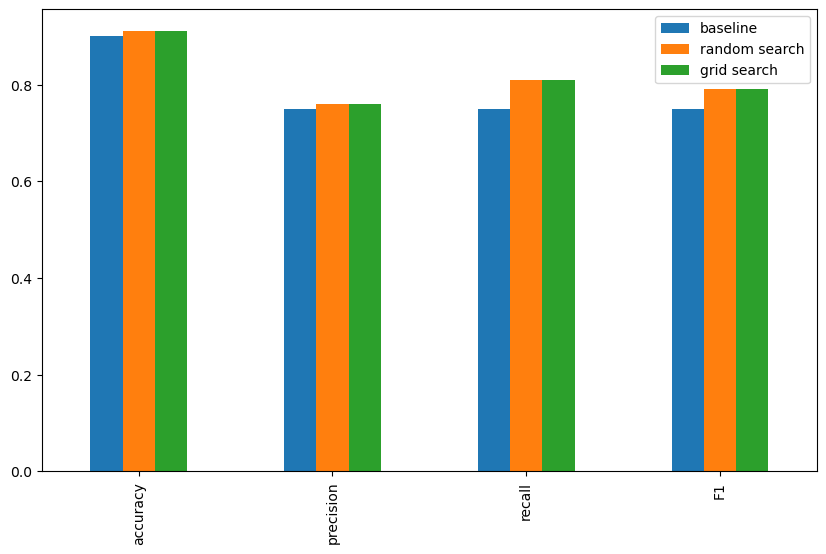

In [40]:
tuning_df.plot(kind="bar", figsize=(10, 6));

## 4. Save and Load the Model

In [41]:
import pickle

In [42]:
pickle.dump(gs_knc, open("./models/diabetes-model.pkl", "wb"))

In [43]:
model = pickle.load(open("./models/diabetes-model.pkl", "rb"))

In [44]:
# Extablish min and max for each column.
# This is becuase we don't want users entering data outside the scope of the limits upon which the model was trained.
min = {}
for i in range(X.shape[1]):
    min[X.columns[i]] = X[X.columns[i]].min()
    
max = {}
for i in range(X.shape[1]):
    max[X.columns[i]] = X[X.columns[i]].max()

In [45]:
diabetes.head()

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,193,77,49,3.9,19,0,61,119,22.5,118,70,32,38,0.84,0
1,146,79,41,3.6,19,0,60,135,26.4,108,58,33,40,0.83,0
2,217,75,54,4.0,20,0,67,187,29.3,110,72,40,45,0.89,0
3,226,97,70,3.2,20,0,64,114,19.6,122,64,31,39,0.79,0
4,164,91,67,2.4,20,0,70,141,20.2,122,86,32,39,0.82,0


In [46]:
min

{'cholesterol': 78,
 'glucose': 48,
 'hdl_chol': 12,
 'chol_hdl_ratio': 1.5,
 'age': 19,
 'gender': 0,
 'height': 52,
 'weight': 99,
 'bmi': 15.2,
 'systolic_bp': 90,
 'diastolic_bp': 48,
 'waist': 26,
 'hip': 30,
 'waist_hip_ratio': 0.68}

In [47]:
max

{'cholesterol': 443,
 'glucose': 385,
 'hdl_chol': 120,
 'chol_hdl_ratio': 19.3,
 'age': 92,
 'gender': 1,
 'height': 76,
 'weight': 325,
 'bmi': 55.8,
 'systolic_bp': 250,
 'diastolic_bp': 124,
 'waist': 56,
 'hip': 64,
 'waist_hip_ratio': 1.14}

In [48]:
# Instantiate a list for responses
responses = []
for i in range(X.shape[1]):
    responses.append(-1)

In [49]:
# Instantiate a list for questions
questions = []
questions.append(f"What is the cholesterol between {min['cholesterol']} and {max['cholesterol']}?\n")
questions.append(f"What is the glucose between {min['glucose']} and {max['glucose']}?\n")
questions.append(f"What is the HDL cholesterol between {min['hdl_chol']} and {max['hdl_chol']}?\n")
questions.append("")
questions.append(f"What is the age between {min['age']} and {max['age']}?\n")
questions.append(f"What is the gender between {min['gender']} and {max['gender']}?\n\t0. Female\n\t1. Male\n")
questions.append(f"What is the height (inches) between {min['height']} and {max['height']}?\n")
questions.append(f"What is the weight (pounds) between {min['weight']} and {max['weight']}?\n")
questions.append("")
questions.append(f"What is the systolic blood pressure between {min['systolic_bp']} and {max['systolic_bp']}?\n")
questions.append(f"What is the diastolic blood pressure between {min['diastolic_bp']} and {max['diastolic_bp']}?\n")
questions.append(f"What is the waist measurement (inches) between {min['waist']} and {max['waist']}?\n")
questions.append(f"What is the hip measurement (inches) between {min['hip']} and {max['hip']}?\n")
questions.append("")

In [50]:
for i in range(len(responses)):
    if (i == 3):
        responses[3] = responses[0] / responses[2]
    if (i == 8):
        responses[8] = (responses[7]/2.2) / ((responses[6]/39.37)**2)
    if (i == 13):
        responses[13] = responses[11] / responses[12]
    else:
        while(responses[i] == -1):
            try:
                responses[i] = int(input("{0}".format(questions[i])))
            except ValueError:
                print("Integer needed")
            if (responses[i] < min[X.columns[i]] or responses[i] > max[X.columns[i]]):
                print("Select a valid option")
                responses[i] = -1


What is the cholesterol between 78 and 443?
210
What is the glucose between 48 and 385?
111
What is the HDL cholesterol between 12 and 120?
58
What is the age between 19 and 92?
48
What is the gender between 0 and 1?
	0. Female
	1. Male
0
What is the height (inches) between 52 and 76?
66
What is the weight (pounds) between 99 and 325?
130
What is the systolic blood pressure between 90 and 250?
120
What is the diastolic blood pressure between 48 and 124?
85
What is the waist measurement (inches) between 26 and 56?
30
What is the hip measurement (inches) between 30 and 64?
34


In [51]:
responses

[210,
 111,
 58,
 3.6206896551724137,
 48,
 0,
 66,
 130,
 21.02633744469488,
 120,
 85,
 30,
 34,
 0.8823529411764706]

In [52]:
answers = pd.DataFrame([responses], columns=['cholesterol', 'glucose', 'hdl_chol', 'chol_hdl_ratio', 'age', 'gender',
                                             'height', 'weight', 'bmi', 'systolic_bp', 'diastolic_bp', 'waist', 'hip',
                                             'waist_hip_ratio'])
answers

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio
0,210,111,58,3.62069,48,0,66,130,21.026337,120,85,30,34,0.882353


In [53]:
result = model.predict(answers)[0]
if result == 1:
    print("This patient probably has diabeetus.")
else: 
    print("This patient probably doesn't have diabeetus.")

This patient probably doesn't have diabeetus.


In [54]:
probability = model.predict_proba(answers)[0][1]
print(f"The probability of this patient having diabeetus is {100*probability:.2f}%.")

The probability of this patient having diabeetus is 28.67%.
